## 1. PROJECT BACKGROUND

In this project, author will try to solve a problem from a data brough by MNC. The data consist of their internal information related to their Television programs. Therefore, author will pose a segmentation solution for its customer, thus clustering the customers/viewers.

The goal of this projects is to see how is the distribution of the customers/viewers so we can give business solutions or ideas.

_____

## 2. FEATURES EXPLANATION

- viewers_id: contained information about viewers_id. There are several ids using UN- and using dynamic number generated
- content_id: contained information about content_id. The ids are using dynamic number generated
- hit_timestamp: contained information describes the time viewers carry out the process of reading per one article
- user_type: describe user type based on registered user and anonymous user or unregistered
- category_id: contained information about category_id. The ids are using dynamic number generated
- tagging: describe the tagging per content_id
- creator_id: describe content owner
- category_name: describe the category name
- viewers_birthdate: describe the birthdate of viewers
- viewers_gender: describe the gender of viewers
- viewers_region: describe the region of viewers


_______

## 3. IMPORT LIBRARIES

In [407]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA
from kmodes.kmodes import KModes

___

## 4. DATA LOADING

4.1 Here I load the required data. Also, I show the first 5 and the last 5 of the data so we can briefly grasp how is the data.

In [342]:
df = pd.read_csv('final_data.csv')
df.head()

,Unnamed: 0,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name,viewers_birthdate,viewers_gender,viewers_region
0,0,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
1,1,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,NaN,NaN,NaN
2,2,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
3,3,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,NaN,NaN,NaN
4,4,UN-kNqX0xJ,WMKZwi,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",99jY83,Hiburan,NaN,NaN,NaN


In [343]:
df.tail()

,Unnamed: 0,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name,viewers_birthdate,viewers_gender,viewers_region
958542,958542,KTq08K,1BZ98E,2022-08-29,Register User,13.0,NaN,39jZ02,Humor,1987-11-05,Male,Jakarta
958543,958543,UN-eRISZYj,1BZ98E,2022-08-29,Anonymus User,13.0,NaN,39jZ02,Humor,NaN,NaN,NaN
958544,958544,KTq08K,1BZ98E,2022-08-29,Register User,13.0,NaN,39jZ02,Humor,1987-11-05,Male,Jakarta
958545,958545,UN-DHiHLsN,bDrGRd,2022-08-12,Anonymus User,13.0,"[{""tag_id"": ""D5mK4C"", ""tag_name"": ""dunia-polit...",99jY83,Humor,NaN,NaN,NaN
958546,958546,UN-DHiHLsN,bDrGRd,2022-08-12,Anonymus User,13.0,"[{""tag_id"": ""D5mK4C"", ""tag_name"": ""dunia-polit...",99jY83,Humor,NaN,NaN,NaN


____

## 5. EXPLORATORY DATA ANALYST

1. Checking the shape of the data. There are 958547 rows and 12 column.

In [344]:
df.shape

(958547, 12)

2. Checking general information of the data.

- We can see some columns have several missing data.
- The type of the data is integers, float, and object.

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958547 entries, 0 to 958546
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         958547 non-null  int64  
 1   viewers_id         958547 non-null  object 
 2   content_id         958547 non-null  object 
 3   hit_timestamp      958547 non-null  object 
 4   user_type          958547 non-null  object 
 5   category_id        958547 non-null  float64
 6   tagging            920275 non-null  object 
 7   creator_id         958547 non-null  object 
 8   category_name      958547 non-null  object 
 9   viewers_birthdate  4115 non-null    object 
 10  viewers_gender     4115 non-null    object 
 11  viewers_region     3988 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 87.8+ MB


3. Checking missing value
- As we can see there are several missing values in the data.
- Later, we can exclude the last three columns since they have more missing data than non-missing data.
- In tagging column, since the quantities no more than ten percent, we can delete the rows with missing data.

In [346]:
df.isnull().sum()

Unnamed: 0                0
viewers_id                0
content_id                0
hit_timestamp             0
user_type                 0
category_id               0
tagging               38272
creator_id                0
category_name             0
viewers_birthdate    954432
viewers_gender       954432
viewers_region       954559
dtype: int64

4. Checking duplicated value
- There is no duplicated value detected so far.

In [347]:
df.duplicated().sum()

0

5. Checking unique values
- Here we check the unique values in the columns.

In [348]:
print('viewers_id unique values : ', df.viewers_id.nunique())
print('content_id unique values : ', df.content_id.nunique())
print('user_type unique values : ', df.user_type.nunique())
print('category_id unique values : ', df.category_id.nunique())
print('creator_id unique values : ', df.creator_id.nunique())
print('category_name unique values : ', df.category_name.nunique())
print('tagging unique values : ', df.tagging.nunique())

viewers_id unique values :  54632
content_id unique values :  24097
user_type unique values :  2
category_id unique values :  18
creator_id unique values :  565
category_name unique values :  18
tagging unique values :  18863


6. Deleting missing values and drop columns that contain many missing values
- Deleting the first and the last three columns.
- The last three columns deleted with previous mentioned reason.
- The first column deleted since it's just the index.
- Here also we drop missing values.

In [349]:
df_new = df.copy()
df_new.drop(columns=['Unnamed: 0', 'viewers_birthdate', 'viewers_gender', 'viewers_region'], inplace=True)
df_new.dropna(inplace=True)
df_new.isnull().sum()

viewers_id       0
content_id       0
hit_timestamp    0
user_type        0
category_id      0
tagging          0
creator_id       0
category_name    0
dtype: int64

7. Rechecking the data

In [350]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920275 entries, 0 to 958546
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   viewers_id     920275 non-null  object 
 1   content_id     920275 non-null  object 
 2   hit_timestamp  920275 non-null  object 
 3   user_type      920275 non-null  object 
 4   category_id    920275 non-null  float64
 5   tagging        920275 non-null  object 
 6   creator_id     920275 non-null  object 
 7   category_name  920275 non-null  object 
dtypes: float64(1), object(7)
memory usage: 63.2+ MB


8. Checking value in the viewers_id column
- Since the first two values in the viewers_id column have the samme values, we need to check how is the real data in the column.
- It seems that the columns with 'RY8dNmQ' ID have two duplicated data.

In [351]:
df_new[df_new['viewers_id'] == 'UN-RY8dNmQ']

,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name
0,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan
1,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan
231078,UN-RY8dNmQ,jja1Qj,2022-07-31,Anonymus User,22.0,"[{""tag_id"": ""Db3xSx"", ""tag_name"": ""parto-patri...",99jY83,Gaya Hidup
231081,UN-RY8dNmQ,jja1Qj,2022-07-31,Anonymus User,22.0,"[{""tag_id"": ""Db3xSx"", ""tag_name"": ""parto-patri...",99jY83,Gaya Hidup


9. Further Checking value in the viewers_id column
- For deeper investigation, we need to check viewers column again, now with ID 'UN-b1g5Cc6'
- It seems that there are many duplicated data.

In [352]:
df_new[df_new['viewers_id'] == 'UN-b1g5Cc6']

,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name
2,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan
3,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan
8,UN-b1g5Cc6,7pnFpi,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""A7hdu3"", ""tag_name"": ""artis-indon...",39jZ33,Hiburan
40299,UN-b1g5Cc6,I8wMgh,2022-07-31,Anonymus User,33.0,"[{""tag_id"": ""8tqGr8"", ""tag_name"": ""warisan bud...",39jY83,Wisata dan Kuliner
40300,UN-b1g5Cc6,6Y46LM,2022-07-31,Anonymus User,33.0,"[{""tag_id"": ""RSBfEb"", ""tag_name"": ""yogyakarta""...",39jY82,Wisata dan Kuliner
40301,UN-b1g5Cc6,mrKprO,2022-07-31,Anonymus User,33.0,"[{""tag_id"": ""nxgWCm"", ""tag_name"": ""bantul"", ""t...",39jZ26,Wisata dan Kuliner
40303,UN-b1g5Cc6,zBIsZ2,2022-07-31,Anonymus User,33.0,"[{""tag_id"": ""pUrs9w"", ""tag_name"": ""jet-tempur-...",39jY82,Wisata dan Kuliner
231091,UN-b1g5Cc6,pc0IE4,2022-07-31,Anonymus User,22.0,"[{""tag_id"": ""kV7rLC"", ""tag_name"": ""artis-gante...",39jZ33,Gaya Hidup
231095,UN-b1g5Cc6,pc0IE4,2022-07-31,Anonymus User,22.0,"[{""tag_id"": ""kV7rLC"", ""tag_name"": ""artis-gante...",39jZ33,Gaya Hidup
231096,UN-b1g5Cc6,pc0IE4,2022-07-31,Anonymus User,22.0,"[{""tag_id"": ""kV7rLC"", ""tag_name"": ""artis-gante...",39jZ33,Gaya Hidup


5.9 Further checking duplicated data after dropping unnecessary columns
- Here we check the duplicated data again after dropping some unnecessary columns in step 5.6.
- Now we can located there are 451,854 duplicated rows.

In [353]:
df_new.duplicated().sum()

451854

5.10 Dropping duplicated columns

In [408]:
df_new.drop_duplicates(inplace=True)
df_new.duplicated().sum()

0

5.11 Checking the current shape of the data
- Now we have 468421 rows and, 8 columns.

In [356]:
df_new.shape

(468421, 8)

5.12 Iterating tagging column to get tag name
- The tagging column is the metadata from MNC viewers information.
- So, in order to get the tag name, we need to iterate the columns.
- Here we got 468421 tag name, the same with length of the dataframe.

In [357]:
meta_tagging = df_new['tagging'].str.split(',')

list_tagging = []

for i in meta_tagging:
    list_tagging.append(i[1])

final_tagging = [i.split(':', 1)[1] for i in list_tagging]

len(final_tagging)

468421

5.13 Assigning the tagging name to new column

In [358]:
df_new['new_tagging'] = final_tagging
df_new['new_tagging'] = df_new['new_tagging'].str.replace('"', '')
df_new.head()

,viewers_id,content_id,hit_timestamp,user_type,category_id,tagging,creator_id,category_name,new_tagging
0,UN-RY8dNmQ,OC0RuX,2022-07-30,Anonymus User,23.0,"[{""tag_id"": ""l33saH"", ""tag_name"": ""nathalie-ho...",99jY83,Hiburan,nathalie-holscher
2,UN-b1g5Cc6,EsWkCd,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""Tw9Th4"", ""tag_name"": ""deddy-corbu...",99jY83,Hiburan,deddy-corbuzier
4,UN-kNqX0xJ,WMKZwi,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",99jY83,Hiburan,valencia-tanoesoedibjo
5,UN-aT1jBga,WMKZwi,2022-08-13,Anonymus User,23.0,"[{""tag_id"": ""MSDG2f"", ""tag_name"": ""valencia-ta...",99jY83,Hiburan,valencia-tanoesoedibjo
6,UN-kNqX0xJ,gtFp7N,2022-07-31,Anonymus User,23.0,"[{""tag_id"": ""rQn4Gq"", ""tag_name"": ""raffi-ahmad...",99jY83,Hiburan,raffi-ahmad


5.14 Data Distributin in Category Name
- Olahraga column have the most values than others, followed by Politik & Peristiwa.

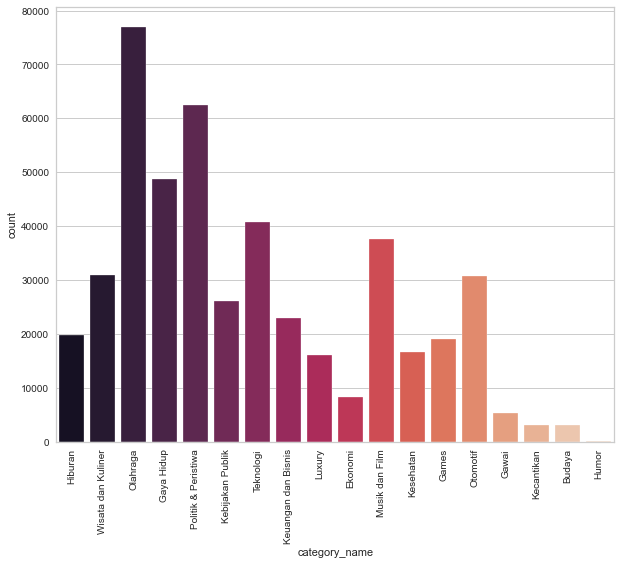

In [361]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.countplot(data=df_new, x='category_name', palette='rocket')
ax.tick_params(axis='x', labelrotation=90)

5.15 Data Distributin in Timestamp
- It seems that this column is when the data generated.
- There is not much information we can get in this column, so later we can exclude this column.

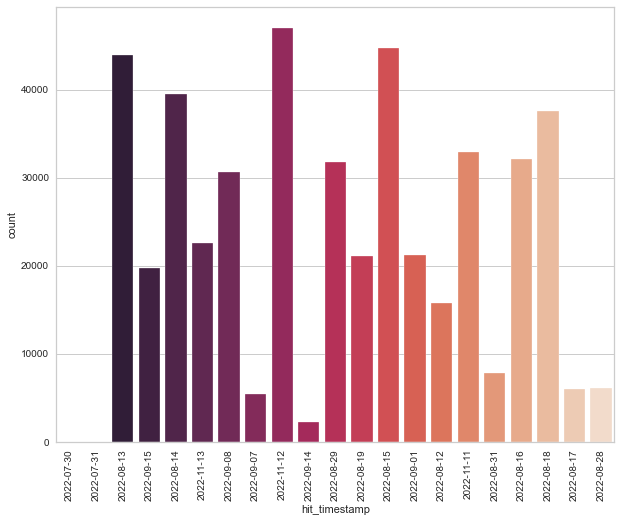

In [362]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.countplot(data=df_new, x='hit_timestamp', palette='rocket')
ax.tick_params(axis='x', labelrotation=90)

___

## 6. FEATURE ENGINEERING & FEATURE SELECTION 

6.1 Selecting necessary columns for features
- Here I just include these 4 columns as features for this project.
- As you may see, all the features are categories column.

In [418]:
df_final_2 = df_new[['content_id', 'creator_id', 'category_name', 'new_tagging']]
df_final_2.head()

,content_id,creator_id,category_name,new_tagging
0,OC0RuX,99jY83,Hiburan,nathalie-holscher
2,EsWkCd,99jY83,Hiburan,deddy-corbuzier
4,WMKZwi,99jY83,Hiburan,valencia-tanoesoedibjo
5,WMKZwi,99jY83,Hiburan,valencia-tanoesoedibjo
6,gtFp7N,99jY83,Hiburan,raffi-ahmad


6.2 Convert column type
- To reduce memory, we need to convert the type of the columns. So, the cell can run faster.

In [422]:
df_final_2['content_id'] = df_final_2['content_id'].astype('category')
df_final_2['creator_id'] = df_final_2['creator_id'].astype('category')
df_final_2['category_name'] = df_final_2['category_name'].astype('category')
df_final_2['new_tagging'] = df_final_2['new_tagging'].astype('category')

df_final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468421 entries, 0 to 958545
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   content_id     468421 non-null  category
 1   creator_id     468421 non-null  category
 2   category_name  468421 non-null  category
 3   new_tagging    468421 non-null  category
dtypes: category(4)
memory usage: 7.7 MB


/var/folders/_d/0tjpkpcd0wg39zfsbnkxzgt40000gp/T/ipykernel_68261/1771443353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_2['content_id'] = df_final_2['content_id'].astype('category')
/var/folders/_d/0tjpkpcd0wg39zfsbnkxzgt40000gp/T/ipykernel_68261/1771443353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_2['creator_id'] = df_final_2['creator_id'].astype('category')
/var/folders/_d/0tjpkpcd0wg39zfsbnkxzgt40000gp/T/ipykernel_68261/1771443353.py:3: SettingWithCopyWarning: 
A value

6.3 Model Selection
- The problem we face a bit unique, since all the features are categories.
- To solve customer segmentation with all categories features we can use KModes.
- KModes clustering is one of the unsupervised Machine Learning algorithms that is used to cluster categorical variables.
- KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means.
- However, for categorical data points, we cannot calculate the distance. So we go for KModes algorithm. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means.

6.4 Finding Optimal Number of Cluster
- For KModes, plot cost for a range of K values. Cost is the sum of all the dissimilarities between the clusters.
- We need to select the K where we observe an elbow-like bend with a lesser cost value.
- We can see that the line dives down from 1 to 4 clusters.
- K=4 maybe have the lowest cost value among 1-4, but to reduce too spesific model author choose to pick K=3.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1615536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1615536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1615536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1615536.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1615536.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1079, cost: 1581273.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5891, cost: 1561764.0
Init: initializing centroids
Init: initializing cluster

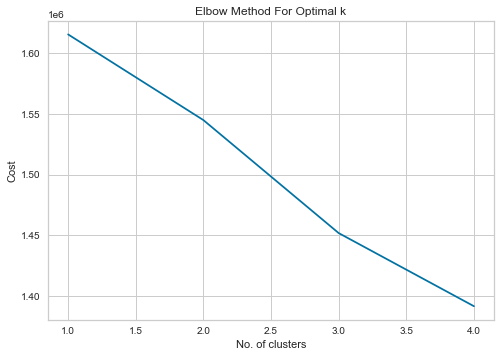

In [390]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_final_2)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## 7. MODEL DEFINITION 

7.1 Define Model
- Define KModes model with 3 clusters.
- Fit the model with the data and predict the cluster based in the data fitted.

In [391]:
#Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_final_2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25120, cost: 1433847.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 34274, cost: 1460880.0
Run 2, iteration: 2/100, moves: 0, cost: 1460880.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 64974, cost: 1464919.0
Run 3, iteration: 2/100, moves: 12888, cost: 1464919.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 55857, cost: 1454179.0
Run 4, iteration: 2/100, moves: 0, cost: 1454179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 21152, cost: 1445254.0
Best run was number 1


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

___

## 8. EXPLORATORY DATA ANALYS AS MODEL EVALUATION

8.1 Assign cluster to respective rows

In [392]:
df_final_2.insert(0, "Cluster", clusters, True)
df_final_2.head()

,Cluster,content_id,creator_id,category_name,new_tagging
0,0,OC0RuX,99jY83,Hiburan,nathalie-holscher
2,0,EsWkCd,99jY83,Hiburan,deddy-corbuzier
4,0,WMKZwi,99jY83,Hiburan,valencia-tanoesoedibjo
5,0,WMKZwi,99jY83,Hiburan,valencia-tanoesoedibjo
6,0,gtFp7N,99jY83,Hiburan,raffi-ahmad


8.2 Cluster Member Counts
- Cluster 0 have the highest values, followed by cluster 1.

In [394]:
df_final_2.Cluster.value_counts()

0    235751
1    142801
2     89869
Name: Cluster, dtype: int64

8.3 Cluster Distribution based in Category
- Cluster 0 : Have the highest values. Majority the viewers from 'Politik & Peristiwa', followed by 'Musik dan Film', and 'Gaya Hidup'. The amount viewers for other category is graduelly decreasing.
- Cluster 1 : Have the second highest values. Majority viewers from 'Teknologi', followerd by 'Kebijakan Publik' and 'Gaya Hidup'. The amount viewers for other category is graduelly decreasing.
- Cluster 2 : Have the least values than other clusters. Majority viewers from Olahraga. The difference from other viewers are so significant, this is the unique charateristic from this cluster.

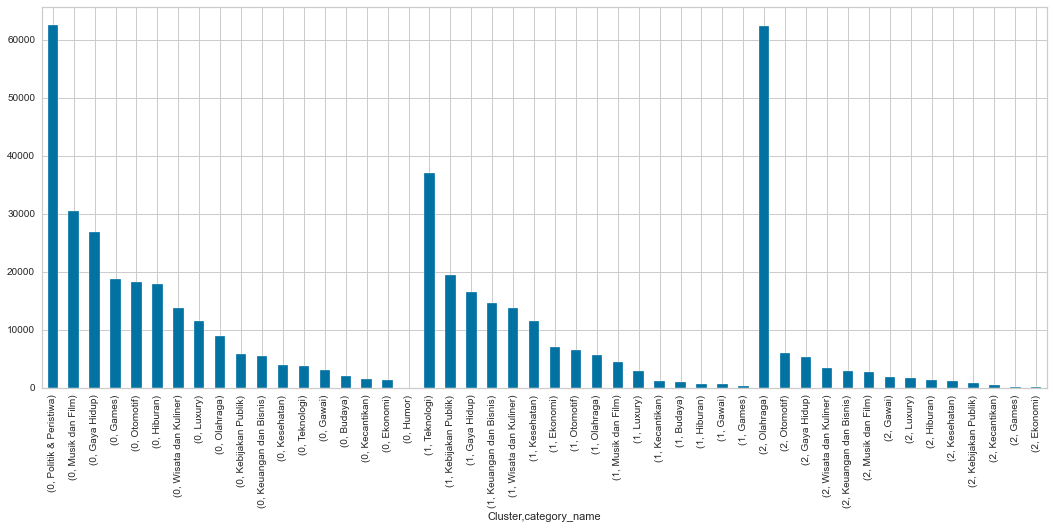

In [406]:
df_by_cluster = df_final_2.groupby('Cluster')['category_name'].value_counts().plot.bar(figsize=(18, 7))

_____

## 9. CONCLUSION & IDEAS

9.1 Technical Conclusion
- In this unique problem that the data have all categories features with can use KModes to cluster the viewers.
- The number of cluster in this project is 3, after taking the cost values into consideration.
- Cluster 0 are the cluster with viewers that focus in Politics in majority, followed with they who want to watch films and listing to music. This cluster also has several viewers with the Humours category in the least values. It seems that the viewers from this cluster have customers from every category with somewhat balanced viewers compared to other clusters. The viewers from this cluster also seem to be the regular customer of the television that watching the TV on their daily basis.
- Cluster 1 are the cluster with viewers focus on Technology in majority followed by they who want to see 'public policy', 'life syle' & 'business and finance'. The cluster viewers may not use TV as many as cluster 0 or maybe do not have viewers as many as cluster 0, but it seems that they look something more specific or make TV with specific purposes as we can see that they have technology, public policy and business & finance as its top 5 viewers.
- Cluster 2 are even more specific. The major viewers are they who wacthing sports. The others categories have significant differences, if we compared how other viewers in other clusters apart from their majority viewers. The viewers from this cluster seem to watch TV only to stay updated to the news in the sports only.

9.2 Business Ideas & Suggestions
- Suppose we will have new programs, the programs that are segmented for cluster 0 and cluster 1 are likely to more valuable and promising.
- Suppose we are confused to make which programs first into development, we may take the consideration based on the sequence of respective cluster(ex:Politics then Music/Film for Cluster 0, Technology then Public Policy for Cluster 1 and so on).
- François Chollet, a software engineer & Keras author, once said that the data is more important then the model. If we have good data, then we can make good predictive model as well. Which allows to generate better business ideas. Fort further improvement, we may need to build or add new information like time of spesific category program will be aired, so we can analyze which kind of program is better to make and when it's better to be aired.
- Another data that can be utilized later is about cost production or net profit for specific program or category. Should we have the information, we may be able to predict which kind of programs that are more valuable in term of cost and profit. We also are able to reduce the needless effort by cut the program that need high cost but low profit.

